In [191]:

import sys
import os
import matplotlib as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import importlib

# Adding my working path to System path.

system_path = os.path.abspath('..')
if system_path in sys.path:
    print('Path already exist')
else:
    sys.path.append(system_path)


Path already exist


### The following code Auto load the changes from the src script folder.

In [192]:
%load_ext autoreload
%autoreload 2
from src.EDA_publisher_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Task 1

## Loading the dataset

In [193]:
data = pd.read_csv('../data/raw_analyst_ratings.csv')

## Creating Instance of the Class

In [194]:
analysis_data =EDA_publisher_analysis(data)

##  Descriptive Statistics:
### Obtain basic statistics for textual lengths (like headline length).

In [195]:
analysis_data.descriptive_headline()

count    1.048575e+06
mean     7.300076e+01
std      4.029646e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

### Count the number of articles per publisher to identify which publishers are most active.

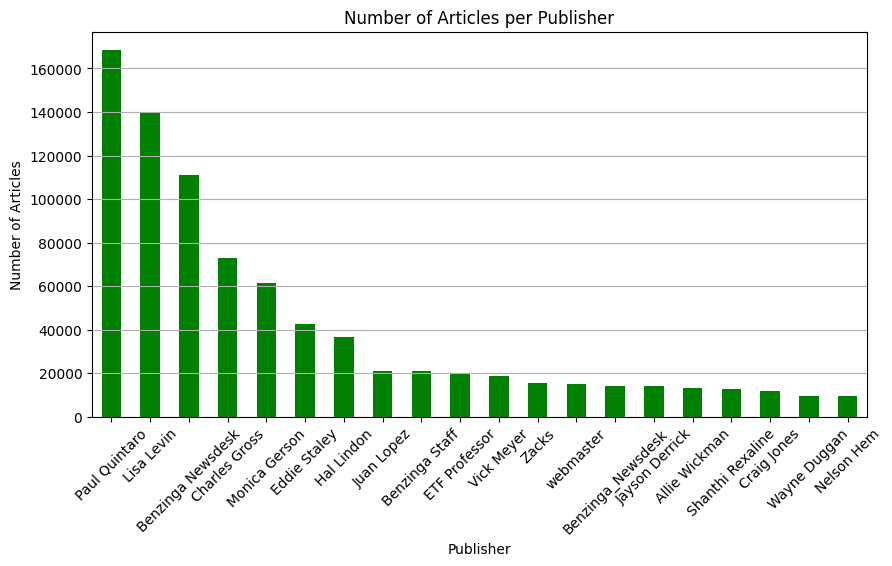

In [196]:
analysis_data.descriptive_statistics()  

### Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

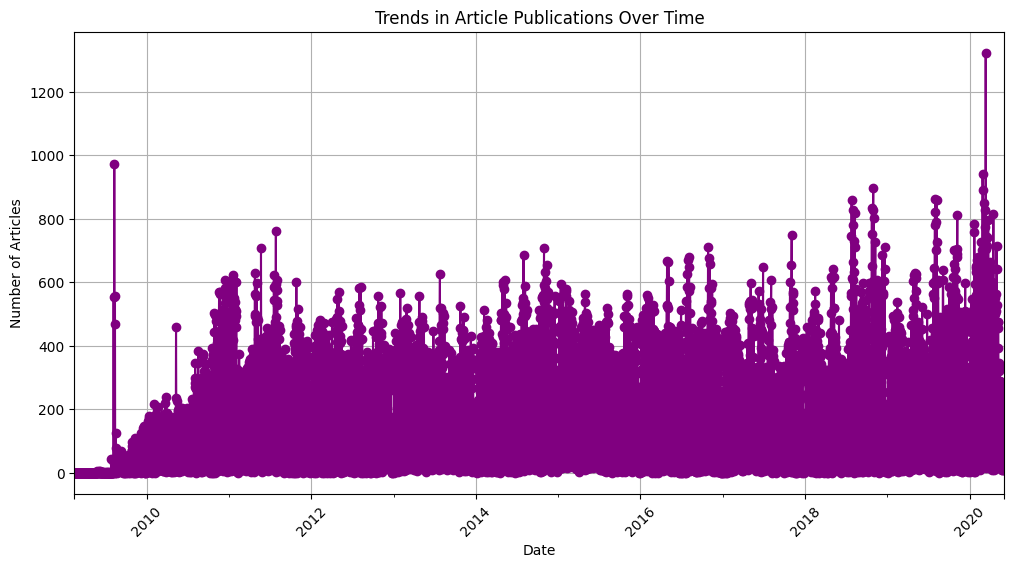


Publication Trends Summary:
 count    4128.000000
mean      243.968508
std       199.796969
min         0.000000
25%        19.000000
50%       281.000000
75%       394.000000
max      1323.000000
dtype: float64


In [197]:
## Analyze publication trends
analysis_data.analyze_publication_trends() 

## Text Analysis(Topic Modeling):
####  Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).

In [198]:
analysis_data.clean_data()

Data cleaning completed.


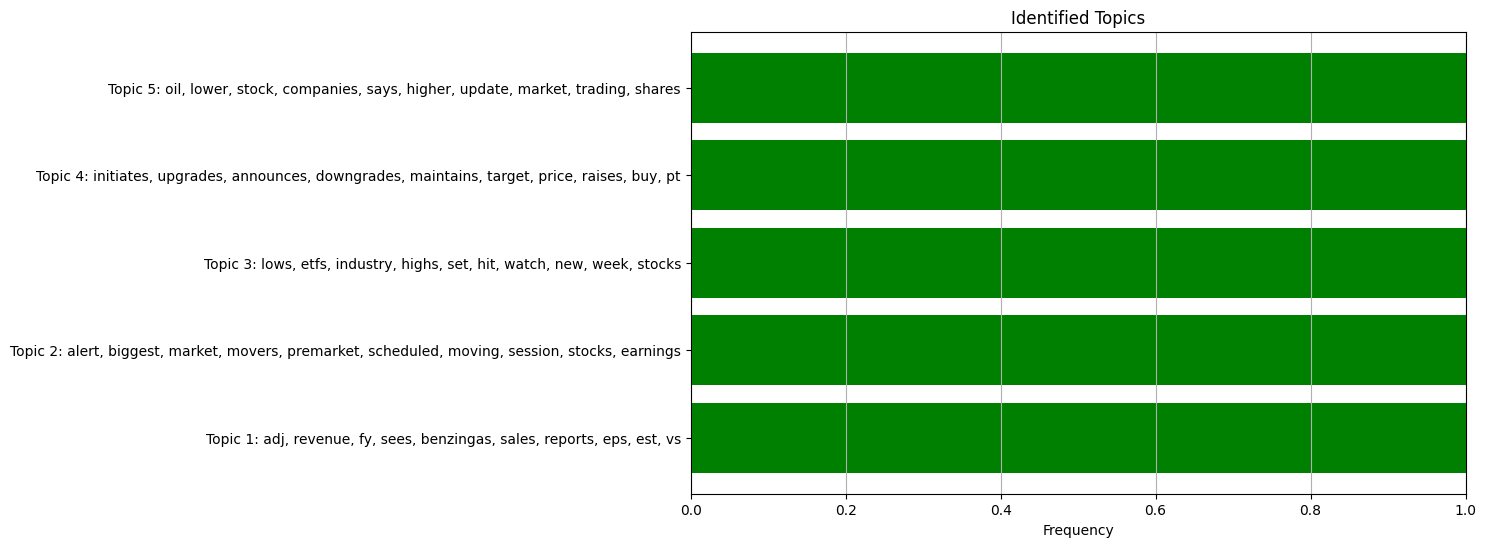

In [90]:
analysis_data.analyze_topics_in_articles(num_topics=5, num_keywords=10)

#### How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?

d:\10Acadamy\week1_challenge\src\EDA_publisher_analysis.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


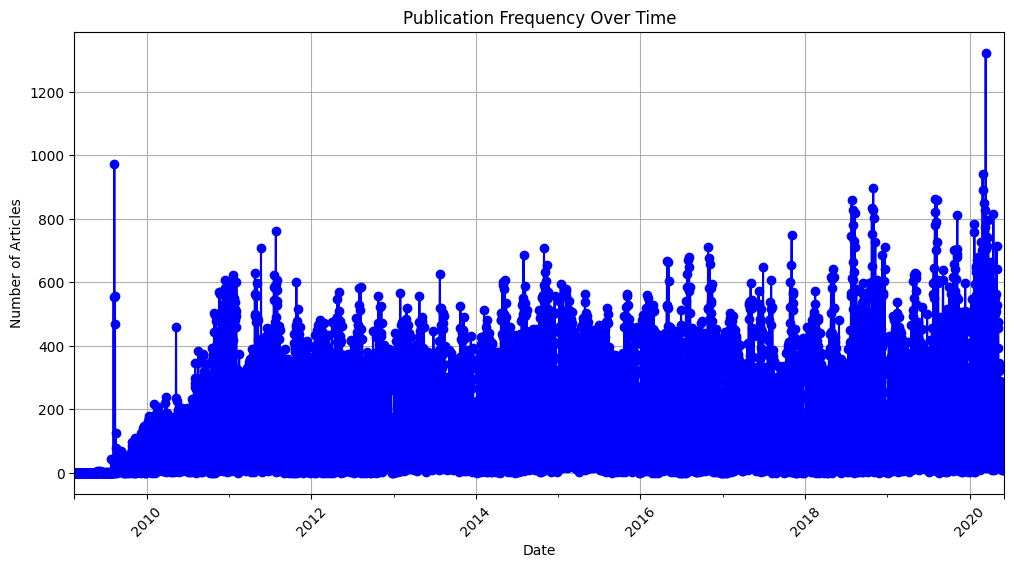


Spikes in Publication Frequency:
 date
2009-04-27      1
2009-04-29      1
2009-05-22      1
2009-05-27      5
2009-05-29      2
             ... 
2020-04-29    714
2020-04-30    641
2020-05-26    262
2020-05-27    228
2020-05-28    236
Length: 1031, dtype: int64


In [199]:
analysis_data.analyze_publication_frequency_variation()

### Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.

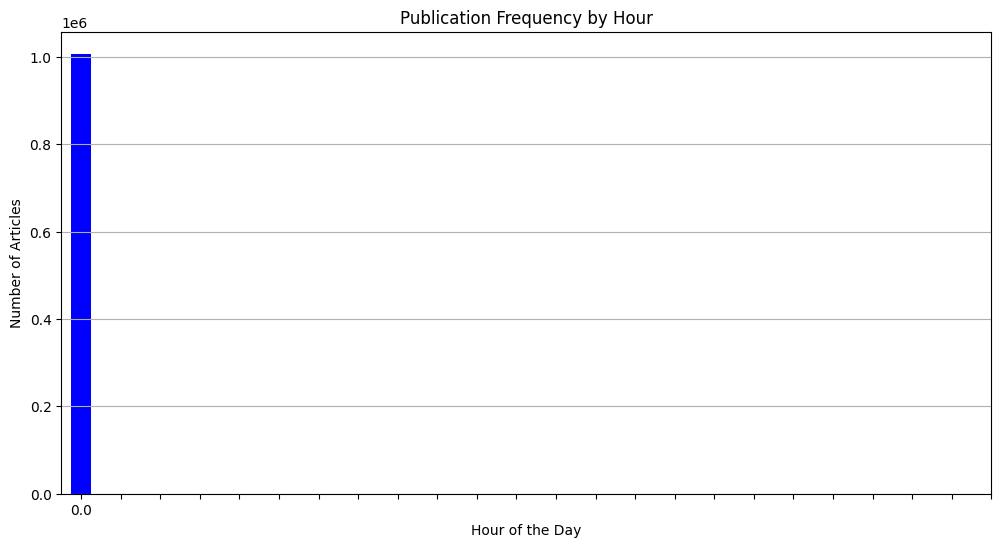


Peak Publishing Hours:
 publication_hour
0.0    1007102
Name: count, dtype: int64


In [28]:
analysis_data.analyze_publication_times_for_trading()
        

## Publisher Analysis:
### Which publishers contribute most to the news feed? 

In [29]:
analysis_data.analyze_publishers_contribution()


Top Publishers:
 publisher
Paul Quintaro        168435
Lisa Levin           139785
Benzinga Newsdesk    111281
Charles Gross         72892
Monica Gerson         61374
Eddie Staley          42702
Hal Lindon            36445
Juan Lopez            21153
Benzinga Staff        20926
ETF Professor         19812
Name: count, dtype: int64
No 'category' column found for analyzing news types.


## Publisher Analysis:
### If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.


Top Domains Contributing to News Feed:
 domain
benzinga              5976
gmail                   96
andyswan                 4
investdiva               2
tothetick                2
eosdetroit               1
forextraininggroup       1
stockmetrix              1
Name: count, dtype: int64


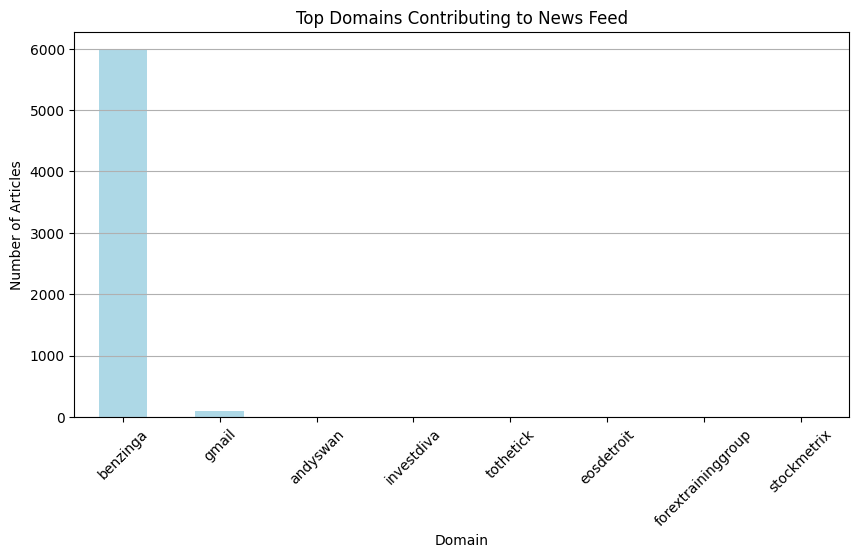

In [30]:
analysis_data.analyze_unique_domains_from_publishers()

In [33]:
# import pandas as pd  # Adjust the path if necessary
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# import nltk
# from datetime import datetime
# from src.Topic_Modeling import *
# nltk.data.path.append('C:/Users/W-HP/AppData/Roaming/nltk_data')  # Adjust this path accordingly
# # Download necessary NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')


# 2. Task 2

## importing neccessary Libraries

In [200]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import yfinance as yf


## loading the dataset

In [ ]:
# aapl_data = pd.read_csv('../data/AAPL_historical_data.csv')
# amzn_data = pd.read_csv('../data/AMZN_historical_data.csv')
# goog_data = pd.read_csv('../data/GOOG_historical_data.csv')
# meta_data = pd.read_csv('../data/META_historical_data.csv')
# msft_data = pd.read_csv('../data/MSFT_historical_data.csv')
# nvda_data = pd.read_csv('../data/NVDA_historical_data.csv')
# tsla_data = pd.read_csv('../data/TSLA_historical_data.csv')

In [ ]:
# combined_data = pd.concat([
#     aapl_data, 
#     amzn_data, 
#     goog_data, 
#     meta_data, 
#     msft_data, 
#     nvda_data, 
#     tsla_data
# ], ignore_index=True)

In [228]:
combined_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [232]:
file_paths = [
        '../data/AAPL_historical_data.csv',
        '../data/AMZN_historical_data.csv',
        '../data/GOOG_historical_data.csv',
        '../data/META_historical_data.csv',
        '../data/MSFT_historical_data.csv',
        '../data/NVDA_historical_data.csv',
        '../data/TSLA_historical_data.csv'
    ]

In [233]:
import yfinance as yf
from src.Quantitative_analysis import *

In [235]:
quantitative_analysis = Quantitative_analysis(file_paths)

In [236]:
quantitative_analysis.load_data()

Combined data loaded: 45428 rows.


In [237]:
quantitative_analysis.apply_technical_indicators()

Technical indicators calculated.


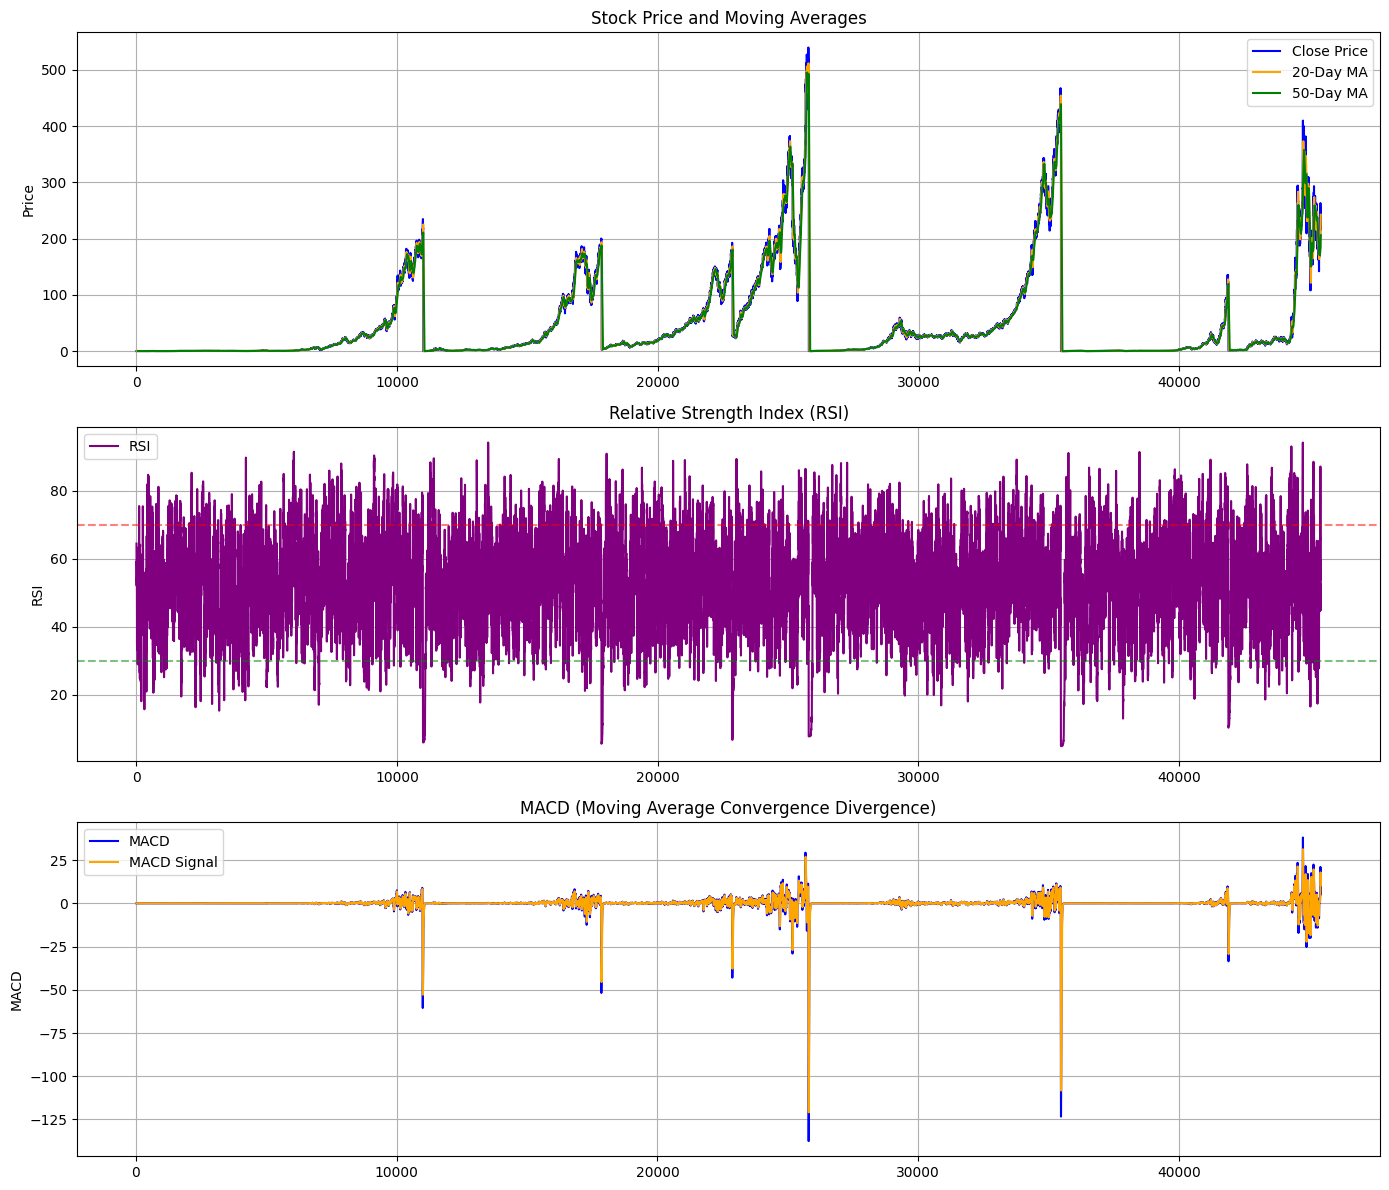

In [238]:
quantitative_analysis.visualize_data()

In [240]:

from src.StockNewsCorrelationAnalyzer import *


In [ ]:
news_data = pd.read_csv('../data/raw_analyst_ratings.csv')

In [245]:
analyzer = StockNewsCorrelationAnalyzer(file_paths, news_data)

In [246]:
analyzer.load_data()

Error loading data: Invalid file path or buffer object type: <class 'list'>
